In [2]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

In [3]:
Delta, gamma, J, Jl, DeltaZ1, DeltaZ2 = 0.01, 0.001, 1, 0.5, 0.1, 0.1

In [4]:
e = [Delta, gamma, J, Jl, DeltaZ1, DeltaZ2]

In [5]:
d1up = tensor(sigmam(), qeye(2), qeye(2), qeye(2))
d1dw = tensor(sigmaz(), sigmam(), qeye(2), qeye(2))
d2up = tensor(sigmaz(), sigmaz(), sigmam(), qeye(2))
d2dw = tensor(sigmaz(), sigmaz(), sigmaz(), sigmam())

In [6]:
d1up_d = d1up.dag()
d1dw_d = d1dw.dag()
d2up_d = d2up.dag()
d2dw_d = d2dw.dag()

n1up = d1up_d * d1up
n1dw = d1dw_d * d1dw
n2up = d2up_d * d2up
n2dw = d2dw_d * d2dw

In [7]:
commut1 = commutator(d1up, d1up_d, kind='anti')
commut2 = commutator(d2up, d2up_d, kind='anti')
commut3 = commutator(d1dw, d1dw_d, kind='anti')
commut4 = commutator(d2dw, d2dw_d, kind='anti')

commut5 = commutator(d1up, d1up, kind='anti')
commut6 = commutator(d2up, d2up, kind='anti')
commut7 = commutator(d1dw, d1dw, kind='anti')
commut8 = commutator(d2dw, d2dw, kind='anti')

commut9 = commutator(d1up, d1dw, kind='anti')
commut10 = commutator(d2up, d2dw, kind='anti')
commut11 = commutator(d1up, d2up_d, kind='anti')
commut12 = commutator(d1up, d2dw_d, kind='anti')

In [8]:
print(commut1)

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [9]:
def H(e):
    Delta, gamma, J, Jl, DeltaZ1, DeltaZ2 = e[0], e[1], e[2], e[3], e[4], e[5]
    Hs = Delta * (d1up_d * d2dw_d - d1dw_d * d2up_d)
    Hct = gamma * (d1up_d * d2up + d1dw_d * d2dw)
    Hc = J * (d1up_d * d1up * d1dw_d * d1dw + d2up_d * d2up * d2dw_d * d2dw)
    Hc_2 = Jl * (n1up * n2up + n1up * n2dw + n1dw * n2up + n1dw * n2dw)
    Hz = (DeltaZ1 / 2) * (d1up_d * d1up - d1dw_d * d1dw) + (DeltaZ2 / 2) * (d2up_d * d2up - d2dw_d * d2dw)
    HT = Hs + Hs.dag() + Hct + Hct.dag() + Hc + Hc_2 + Hz 
    return HT

In [10]:
n1up = d1up_d * d1up
n1dw = d1dw_d * d1dw
n2up = d2up_d * d2up
n2dw = d2dw_d * d2dw

In [11]:
print('========================================')
print('n1up')
print(n1up)
print('========================================')
print('n1dw')
print(n1dw)
print('========================================')
print('n2up')
print(n2up)
print('========================================')
print('n2dw')
print(n2dw)

n1up
Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
n1dw
Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (1

In [12]:
basis_list = []
basis_list_string = []
for i in range(2):
    for j in range(2):
        for l in range(2):
            for m in range(2):
                basis_list.append(tensor(basis(2,i), basis(2,j), basis(2,l), basis(2,m)))
                basis_list_string.append('|'+str(i)+str(j)+str(l)+str(m)+'>')

In [13]:
print(basis_list_string)

['|0000>', '|0001>', '|0010>', '|0011>', '|0100>', '|0101>', '|0110>', '|0111>', '|1000>', '|1001>', '|1010>', '|1011>', '|1100>', '|1101>', '|1110>', '|1111>']


In [86]:
#print(basis_list)
#Defining the (possible) eigenstates in draft
psi01plu=(basis_list[11]+basis_list[14])/(np.sqrt(2))
psi01min=(basis_list[11]-basis_list[14])/(np.sqrt(2))
psi2=basis_list[15]
psi34plu=(basis_list[7]+basis_list[13])/(np.sqrt(2))
psi34min=(basis_list[7]-basis_list[13])/(np.sqrt(2))
psi5=basis_list[10]
psi67plu=(basis_list[6]+basis_list[9])/(np.sqrt(2))
psi67min=(basis_list[6]-basis_list[9])/(np.sqrt(2))
psi8=basis_list[5]
psi910plu=(basis_list[3]+basis_list[12])/(np.sqrt(2))
psi910min=(basis_list[3]-basis_list[12])/(np.sqrt(2))
psi1112plu=(basis_list[2]+basis_list[8])/(np.sqrt(2))
psi1112min=(basis_list[2]-basis_list[8])/(np.sqrt(2))
psi1314plu=(basis_list[1]+basis_list[4])/(np.sqrt(2))
psi1314min=(basis_list[1]-basis_list[4])/(np.sqrt(2))
psi15=basis_list[0]
#print(psi15.dag())

In [85]:
#CHECKING covariances
#calculating mean value N1_sigma.N2_sigma'
#State of interest from the definitions above
psigeneric=psi15
#General calculations
N1dw=psigeneric.dag()*n1dw*psigeneric
N1up=psigeneric.dag()*n1up*psigeneric
N2dw=psigeneric.dag()*n2dw*psigeneric
N2up=psigeneric.dag()*n2up*psigeneric
#Cov[N1up.N2dw]
N1upN2dw=psigeneric.dag()*n1up*n2dw*psigeneric
CovN1upN2dw=N1upN2dw-(N1up*N2dw)
print('CovN1upN2dw:',CovN1upN2dw[0][0][0])
#Cov[N1dw.N2up]
N1dwN2up=psigeneric.dag()*n1dw*n2up*psigeneric
CovN1dwN2up=N1dwN2up-(N1dw*N2up)
print('CovN1dwN2up: ',CovN1dwN2up[0][0][0])
#Cov[N1dw.N2dw]
N1dwN2dw=psigeneric.dag()*n1dw*n2dw*psigeneric
CovN1dwN2dw=N1dwN2dw-(N1dw*N2dw)
print('CovN1dwN2dw: ',CovN1dwN2dw[0][0][0])
#Cov[N1up.N2up]
N1upN2up=psigeneric.dag()*n1up*n2up*psigeneric
CovN1upN2up=N1upN2up-(N1up*N2up)
print('CovN1upN2up: ',CovN1upN2up[0][0][0])

CovN1upN2dw: 0j
CovN1dwN2up:  0j
CovN1dwN2dw:  0j
CovN1upN2up:  0j


In [14]:
Delta_list = np.linspace(0, 0.5, 20)
eigenvalues = []
for x in Delta_list:
    e_list = [x, 0.005, 4, 1, 0.5, 0.5]
    eigenvalues.append(H(e_list).eigenenergies())

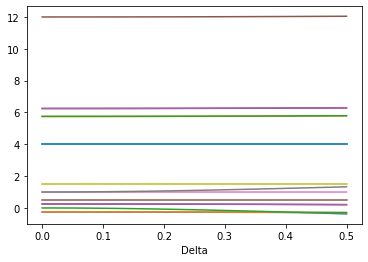

In [15]:
fig, plot_eigenvalues = plt.subplots()
plot_eigenvalues.plot(Delta_list, eigenvalues)
#plt.ylim(-0.2,0.2)
plt.xlabel('Delta')
plt.show()

In [16]:
e_list2 = [0.05, 0.005, 4, 1, 0.5, 0.5]#Delta, gamma, J, Jl, DeltaZ1, DeltaZ2
eigens = H(e_list2).eigenstates()
eigenvecs_list = []
for i in range(16):
    eigenvecs_list.append(eigens[1][i])

In [17]:
print(eigens[0])

[-2.55415945e-01 -2.45417333e-01 -4.97742261e-03  2.44584055e-01
  2.54582667e-01  5.00000000e-01  1.00000000e+00  1.00448954e+00
  1.50000000e+00  4.00000000e+00  4.00003334e+00  5.74541733e+00
  5.75541594e+00  6.24541733e+00  6.25541594e+00  1.20004545e+01]


In [18]:
eigenvecs_list = []
for i in range(16):
    eigenvecs_list.append(eigens[1][i])

In [19]:
proj = {}
coef = {}
for i in range(16):
    proj.update({i: {}})
    coef.update({i: {}})

In [20]:
print(proj) #probabilities for each eigenstate
print(coef) #coefficients of the eigenstates

{0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, 15: {}}
{0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, 15: {}}


In [21]:
for i in range(16):
    for j in range(16):
        c = (basis_list[j].dag() * eigenvecs_list[i])[0][0][0] #coefficientes of the eigenvectors
        p = abs(basis_list[j].overlap(eigenvecs_list[i]))**2 #probabilities amplitudes
        proj.get(i).update({j: p})
        coef.get(i).update({j: c})

In [22]:
import pandas as pd
coefficients_dictionary = {}
for i in range(16):
    coefficients_dictionary.update({'eigen_'+str(i): pd.Series(list(coef.get(i).values()))})
coefficients_table = pd.DataFrame(coefficients_dictionary)

In [23]:
print('eigenvector coefficients:')
print(coefficients_table.eigen_2) #for instance n = 2

eigenvector coefficients:
0     0.000414+0.000000j
1     0.000000+0.000000j
2     0.000000+0.000000j
3     0.000124+0.000000j
4     0.000000+0.000000j
5     0.000000+0.000000j
6    -0.049651+0.000000j
7     0.000000+0.000000j
8     0.000000+0.000000j
9     0.049651+0.000000j
10    0.000000+0.000000j
11    0.000000+0.000000j
12    0.000124+0.000000j
13    0.000000+0.000000j
14    0.000000+0.000000j
15   -0.997532+0.000000j
Name: eigen_2, dtype: complex128


In [24]:
coefficients_table.to_csv('coefficients.csv', index=False)#index=False => exports without the first index column

In [25]:
SA = []
SB = []
for i in range(16):
    rho = ket2dm(eigenvecs_list[i])
    rhoA = rho.ptrace([0,1])
    rhoB = rho.ptrace([2,3])
    SA.append(entropy_vn(rhoA, base=2, sparse=False))
    SB.append(entropy_vn(rhoB, base=2, sparse=False))

In [26]:
class ClassKetCreator:
    
    def __init__(self):
        pass

    def MethodKet(self, basis_string, basis_index, coefficients):
        kets = []
        list1 = list(basis_string)
        list2 = list(basis_index)
        list3 = list(coefficients)
        length = len(list1)
        for i in range(length):
            if abs(list3[i]) > 0.1:
                kets.append(list1[i])
        return kets

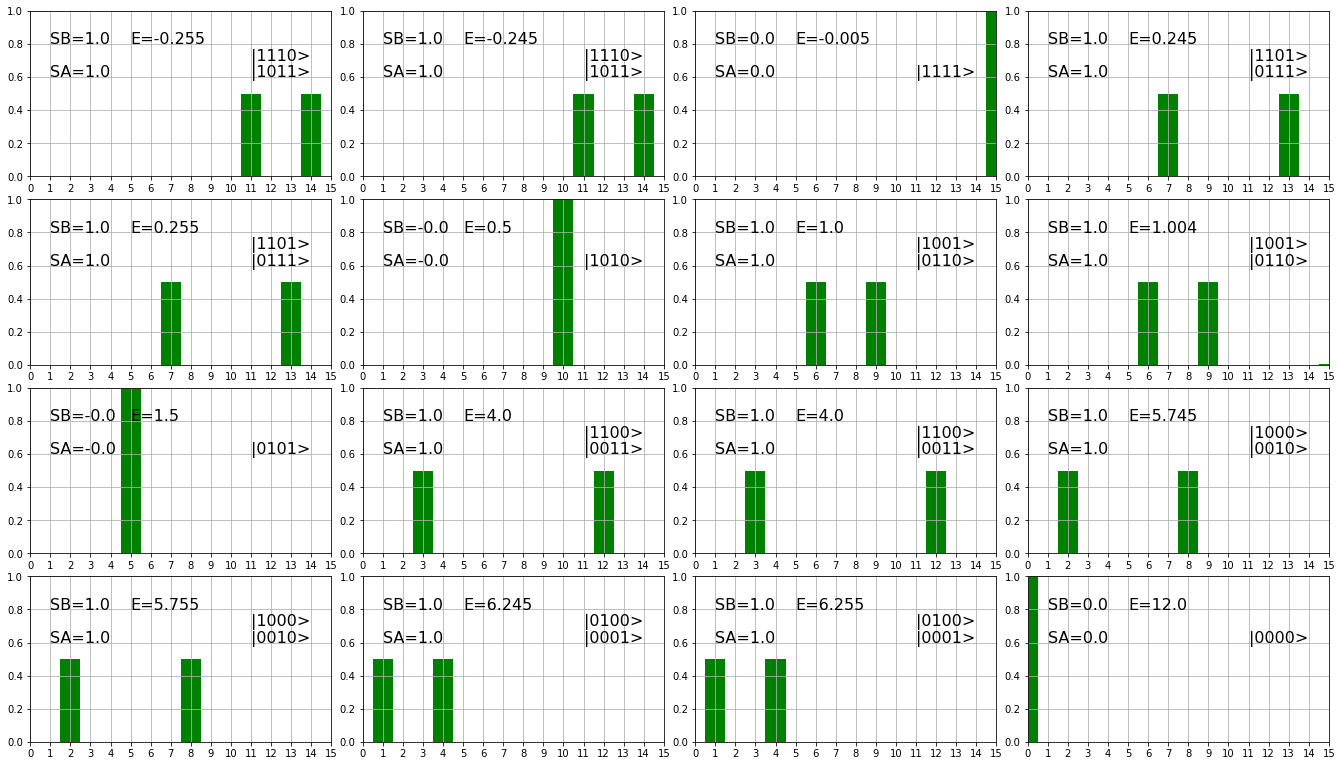

In [27]:
wid = 1
xax = range(16)
fig, ax = plt.subplots(4, 4)
for i in range(16):
    i1 = i // 4
    i2 = i % 4
    ax[i1,i2].bar(proj.get(i).keys(), proj.get(i).values(), wid, color='g')
    ax[i1,i2].set_xlim(0, 15)
    ax[i1,i2].grid(True)
    ax[i1,i2].set_xticks(xax)
    ax[i1,i2].set_ylim([0,1])
    ax[i1,i2].text(5, 0.8, 'E='+str(round(eigens[0][i],3)), size='16')
    ax[i1,i2].text(1, 0.6, 'SA='+str(round(SA[i],1)), size='16')
    ax[i1,i2].text(1, 0.8, 'SB='+str(round(SB[i],1)), size='16')
    ket = ClassKetCreator().MethodKet(basis_list_string, proj.get(i).keys(), coef.get(i).values())
    y_position = 0.5
    for l in range(len(ket)):
        y_position += 0.1
        ax[i1,i2].text(11, y_position, ket[l], size='16')
fig.set_size_inches(18.5, 10.5, forward=True)
fig.tight_layout(pad=0.2)
plt.show()

In [28]:
Psi0 = basis_list[9] # = |1001>

In [29]:
Tmax = 2000
Nt = 8000
deltat = Tmax / Nt
opts = Options(store_states = True)
times = np.linspace(0, Tmax, Nt)
p_1001 = basis_list[9] * basis_list[9].dag()
p_0110 = basis_list[6] * basis_list[6].dag()
p_0000 = basis_list[15] * basis_list[15].dag()
Gamma = 0.001
Czp = np.sqrt(Gamma)*d1up
dynamics = mesolve(H(e_list2), Psi0, times, [Czp], [p_1001, p_0110, p_0000, n1up, n1dw, n2up, n2dw, n1up * n2dw, n1up * n1dw], options=opts)
rho = dynamics.states

In [9]:
print(2**2)

4


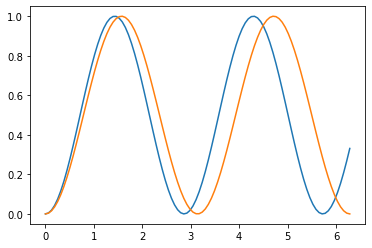

In [19]:
import numpy as np
import matplotlib.pyplot as plt
jl,j,Deltan,gamma=1,4,0.05,0.005
omega=Deltan**2*((1/jl)-(1/(jl-2*j-4*jl)))-(2*gamma**2/(jl-j))
theta= np.linspace(0,2*np.pi,100)
f1=(np.sin(omega*jl*theta/(Deltan*Deltan)))**2
f2=(np.sin(theta))**2
#print(f1)
plt.plot(theta,f1)
plt.plot(theta,f2)

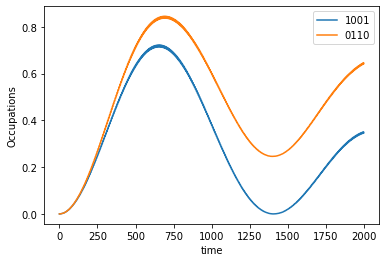

In [30]:
fig, population = plt.subplots()
#population.plot(times, dynamics.expect[0])
#population.plot(times, dynamics.expect[1])
#population.plot(times, dynamics.expect[2])
population.plot(times, dynamics.expect[3])
#population.plot(times, dynamics.expect[4])
#population.plot(times, dynamics.expect[5])
population.plot(times, dynamics.expect[6])
#population.plot(times, dynamics.expect[7])
#population.plot(times, dynamics.expect[8])

population.set_xlabel('time')
population.set_ylabel('Occupations')
population.legend(("1001", "0110", "0000"))
#population.legend(("n1up", "n1dw", "n2up", "n2dw", "n1up n2dw", "n1up n1dw"))

In [31]:
def target_function(phi):
    psi_target = (basis_list[6] + np.exp(1j * phi) * basis_list[9]) / np.sqrt(2)
    rho_target = psi_target * psi_target.dag()
    dic = {'psi': psi_target, 'rho': rho_target}
    return dic

In [32]:
ti = []
fidel1 = []
fidel2 = []
for i in range(Nt):
    ti.append(i * deltat)
    fidel1.append(fidelity(target_function(np.pi/2).get('rho'), rho[i]))
    fidel2.append(fidelity(target_function(-np.pi/2).get('rho'), rho[i]))    

Text(0.5, 1.0, 'Fidelity function')

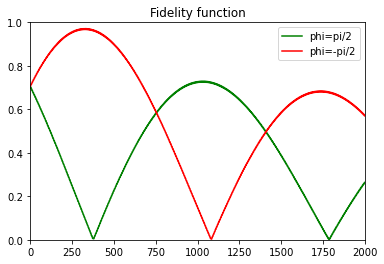

In [33]:
plt.plot(ti, fidel1, color='g')
plt.plot(ti, fidel2, color='r')
plt.ylim(0,1)
plt.xlim(0, Tmax)
plt.legend(("phi=pi/2", "phi=-pi/2"))
plt.title('Fidelity function')

In [34]:
#calculation of covariance
n1up_mean = np.mean(dynamics.expect[3])
n2dw_mean = np.mean(dynamics.expect[6])
S_X = np.std(dynamics.expect[3])
S_Y = np.std(dynamics.expect[6])
covariance_list = []
n_elements = len(times)
for i in range(n_elements):
    delta1 = dynamics.expect[3][i] - n1up_mean
    delta2 = dynamics.expect[6][i] - n2dw_mean
    delta_prod = delta1 * delta2 / (n_elements - 1)
    covariance_list.append(delta_prod)
S_XY = sum(covariance_list)
R_XY = S_XY / (S_X * S_Y) #sample correlation

print(S_X)
print(S_Y)
print(R_XY)
    

0.23935389034544724
0.2331209064204649
0.9118309001970886


f= 0.8384664152160552


NameError: name 'ClassMicroStates' is not defined

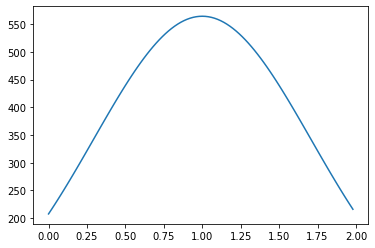

In [35]:
#in this part I'm just refreshing my ideas about the classes below.

prob = []
TMAX = 2
GAMMA = 0.001
NT = 100
tt = []
for i in range(NT):
    tt.append(i  * TMAX / NT)
    prob.append(np.exp(-((i - NT/2) * TMAX / NT)**2)/np.sqrt(np.pi)/GAMMA)
    
y = GAMMA * np.array(prob)
dX = TMAX / NT
from scipy import integrate
f = integrate.simps(y, x=None, dx=dX)
print('f=', f)

prob_numpy = np.array(prob)
plt.plot(tt, prob)

teste = ClassMicroStates(l=1000, gamma=GAMMA, tmax=TMAX, nt=NT, prob_distribution=prob_numpy)
lista1 = teste.create_list()
total_number_elements = teste.checking_number_elements_s1_till_sm(lista1)
fraction_no_tunneling = teste.determining_fraction_f()
total_proba = teste.total_probability_until_time_tmax(lista1)

g = fraction_no_tunneling.get('g')
number_elements_s_m_plus_1 = teste.create_number_elements_s_m_plus_1(g)

complete_list = teste.create_complete_list_of_number_elements(lista1, number_elements_s_m_plus_1)

list_with_repetitions = teste.create_list_with_repetitions(complete_list)

print('lista1=', lista1, len(lista1))
print('total_number_elements=', total_number_elements)
print('fraction_no_tunneling=', fraction_no_tunneling)
print('number_elements_s_m_plus_1=', number_elements_s_m_plus_1)
print('complete list=', complete_list)
print('list_with_repetitions=', list_with_repetitions)

In [ ]:
class ClassMicroStates:

    def __init__(self, l, gamma, tmax, nt, prob_distribution):
        self.L = l
        self.gamma = gamma
        self.tmax = tmax
        self.nt = nt
        self.deltat = tmax / nt
        self.prob = prob_distribution
        
    def create_list(self):
        list_number_of_elements_set_i = self.gamma * self.prob * self.deltat * self.L
        for i in range(len(list_number_of_elements_set_i)):
            if list_number_of_elements_set_i[i] < 1:
                list_number_of_elements_set_i[i] = 0
            else:
                list_number_of_elements_set_i[i] = int(list_number_of_elements_set_i[i])
        return list_number_of_elements_set_i
    
    def checking_number_elements_s1_till_sm(self, list_to_sum):
        s = sum(list_to_sum)
        return s
    
    def total_probability_until_time_tmax(self, list_to_sum):
        p_tot = sum(list_to_sum) / self.L
        return p_tot
    
    def determining_fraction_f(self):
        from scipy import integrate
        y = self.gamma * self.prob
        dx = self.tmax / self.nt
        f = integrate.simps(y, x=None, dx=self.tmax/self.nt)
        g = 1 - f
        dicti = {'f': f, 'g': g}
        return dicti
    
    def create_number_elements_s_m_plus_1(self, g):
        N_S_m_plus_1 = self.L * g
        return N_S_m_plus_1
    
    def create_complete_list_of_number_elements(self, lista_A, n_B):
        final_list = list(lista_A)
        final_list.append(n_B)
        return final_list
    
    def create_list_with_repetitions(self, lista_final):
        dicti = {}
        for i in range(len(lista_final)):
            if int(lista_final[i]) == 0:
                list_in_sets = []
            else:
                list_in_sets = []
                for l in range(int(lista_final[i])):
                    list_in_sets.append(l)
            dicti.update({i: list_in_sets})
        list_repetitions = []
        for i in dicti:
            if len(dicti.get(i)) > 0:
                for l in range(len(dicti.get(i))):
                    list_repetitions.append(i)
        return list_repetitions
    
class SimulateExperiment:

    def __init__(self, repetitions=False, l=False, gamma=False, tmax=False, nt=False, prob_distribution=False):
        self.repetitions = repetitions
        self.L = l
        self.gamma = gamma
        self.tmax = tmax
        self.nt = nt
        self.deltat = tmax / nt
        self.prob = prob_distribution
        
    def detection(self):
        classe = ClassMicroStates(self.L, self.gamma, self.tmax, self.nt, self.prob)

        lista_n_i = classe.create_list()
        f_g = classe.determining_fraction_f()
        n_B = classe.create_number_elements_s_m_plus_1(f_g.get('g'))
        final_list = classe.create_complete_list_of_number_elements(lista_n_i, n_B)
        list_with_repetition = classe.create_list_with_repetitions(final_list)

        from collections import Counter
        import random

        pick_value = []
        for i in range(self.repetitions):
            pick_value.append(random.choice(list_with_repetition))
        recounted = Counter(pick_value)
        recounted.pop(self.nt)
        return recounted

    def detection_for_specific_time(self, time_index_to_measure, time_measurement_interval, number_of_observations): #i need to work on that!
        classe = ClassMicroStates(self.L, self.gamma, self.tmax, self.nt, self.prob)

        lista_n_i = classe.create_list()
        f_g = classe.determining_fraction_f()
        n_B = classe.create_number_elements_s_m_plus_1(f_g.get('g'))
        final_list = classe.create_complete_list_of_number_elements(lista_n_i, n_B)
        list_with_repetition = classe.create_list_with_repetitions(final_list)

        import random

        time_range = []
        for i in range(time_measurement_interval):
            time_range.append(time_index_to_measure+(i-time_measurement_interval/2))
        
        detection_result = []
        for i in range(number_of_observations):
            picked_value = random.choice(list_with_repetition)
            if picked_value in time_range:
                detection_result.append(1)
            else:
                detection_result.append(0)
        return detection_result
    
    def count_sequence_of_detections(self, sequence_of_detections):
        sequence_number = 0
        soma_results = []
        for i in sequence_of_detections:
            soma = 0
            for l in i:
                soma += l
            soma_results.append(soma)
            sequence_number += 1
 
        from collections import Counter

        counted = Counter(soma_results)
        return counted

In [ ]:
L = 1e6
Repetitions = 20000

teste_n1up = SimulateExperiment(repetitions=Repetitions, l=L, gamma=Gamma, tmax=Tmax, nt=Nt, prob_distribution=dynamics.expect[3])
detection_n1up = teste_n1up.detection()

teste_n2dw = SimulateExperiment(repetitions=Repetitions, l=L, gamma=Gamma, tmax=Tmax, nt=Nt, prob_distribution=dynamics.expect[6])
detection_n2dw = teste_n2dw.detection()

In [36]:
plt.bar(detection_n2dw.keys(), detection_n2dw.values(), 1, color='b')
plt.bar(detection_n1up.keys(), detection_n1up.values(), 1, color='g')
plt.legend(('dot 2-spin down', 'dot 1-spin up'))

NameError: name 'detection_n2dw' is not defined

In [ ]:
def sequence_detection_generator(number_of_group_of_detections, time_index_around_detections, time_index_interval, number_of_elements_of_detection_sequence):
    x = time_index_around_detections
    dx = time_index_interval
    N = number_of_elements_of_detection_sequence
    sequence_of_detections_1up = []
    sequence_of_detections_2dw = []
    for i in range(number_of_group_of_detections):
        lista_detected_1up = teste_n1up.detection_for_specific_time(x, dx, N)
        lista_detected_2dw = teste_n2dw.detection_for_specific_time(x, dx, N)
        sequence_of_detections_1up.append(lista_detected_1up)
        sequence_of_detections_2dw.append(lista_detected_2dw)
    dic = {'1up': sequence_of_detections_1up, '2dw': sequence_of_detections_2dw}
    return dic

In [112]:
detection_sequence = sequence_detection_generator(100, 1000, 1000, 20)
counting_1up = teste_n1up.count_sequence_of_detections(detection_sequence.get('1up'))
counting_2dw = teste_n2dw.count_sequence_of_detections(detection_sequence.get('2dw'))
print(counting_1up)
print(counting_2dw)

Counter({1: 35, 0: 25, 2: 24, 3: 12, 4: 3, 7: 1})
Counter({0: 34, 1: 34, 2: 16, 3: 11, 4: 3, 5: 2})


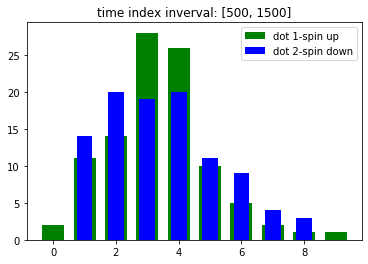

In [118]:
plt.bar(counting_1up.keys(), counting_1up.values(), 0.7, color='g')
plt.bar(counting_2dw.keys(), counting_2dw.values(), 0.5, color='b')
plt.title('time index inverval: [500, 1500]')
plt.legend(('dot 1-spin up', 'dot 2-spin down'))

Counter({3: 27, 4: 22, 2: 15, 1: 14, 5: 9, 6: 7, 0: 4, 7: 1, 8: 1})
Counter({3: 26, 4: 22, 5: 20, 2: 15, 6: 6, 1: 6, 7: 2, 0: 2, 9: 1})


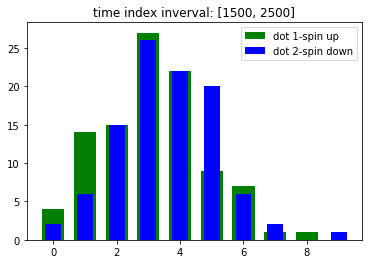

In [120]:
detection_sequence = sequence_detection_generator(100, 2000, 1000, 20)
counting_1up = teste_n1up.count_sequence_of_detections(detection_sequence.get('1up'))
counting_2dw = teste_n2dw.count_sequence_of_detections(detection_sequence.get('2dw'))
print(counting_1up)
print(counting_2dw)

plt.bar(counting_1up.keys(), counting_1up.values(), 0.7, color='g')
plt.bar(counting_2dw.keys(), counting_2dw.values(), 0.5, color='b')
plt.title('time index inverval: [1500, 2500]')
plt.legend(('dot 1-spin up', 'dot 2-spin down'))